<a href="https://colab.research.google.com/github/sxudan/artificial-intelligence-journey/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Python

## Linear model

```
y = w * x + b (w = weight, x = input, b = bias)
which can be represented by linear equation
y = mx + c

so w = m (slope), b = c (y-intercept)
```

The goal of training an ANN is to adjust the weights in such a way that the network learns to make accurate predictions or classifications for a given task.

Here's how the weights are modified during training:

Initialization: Initially, the weights in the network are typically initialized randomly. These initial weights determine how the network initially behaves before any training occurs.

Forward Propagation: During training, input data is fed forward through the network, and the output predictions are calculated based on the current weights. This process is known as forward propagation.

Loss Calculation: The output predictions are compared to the true target values using a loss function, which quantifies the difference between the predicted and actual values. The choice of loss function depends on the specific task (e.g., mean squared error for regression, cross-entropy loss for classification).

Backpropagation: The error (or loss) calculated by the loss function is then propagated backward through the network in a process called backpropagation. During backpropagation, the gradients of the loss with respect to each weight in the network are computed using techniques like the chain rule of calculus.

Gradient Descent: The gradients computed during backpropagation are used to update the weights in the network in the direction that reduces the loss. This is typically done using optimization algorithms such as gradient descent, stochastic gradient descent (SGD), or variants like Adam or RMSprop.

Iterations: Steps 2 through 5 are repeated for multiple iterations (epochs) over the training data. With each iteration, the weights are adjusted incrementally to minimize the loss and improve the network's performance on the task.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

## Dense Layer

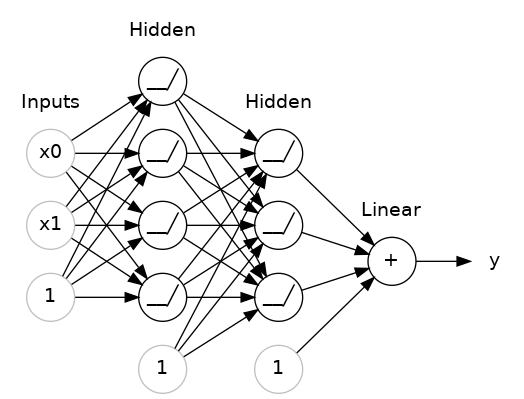

In a dense layer, each neuron is connected to every neuron in the preceding layer, forming a fully connected network structure.

This units parameter specifies the number of neurons (or units) in the Dense layer.

The input_shape parameter = [num_columns] and this parameter is only required for the first layer of the model. Subsequent layers can infer their input shapes automatically based on the output shapes of the previous layers.

Here, 'relu' stands for Rectified Linear Unit, which is being used as an activation function. Without activation function the output will be have linear relationship with the input.

In [4]:
model = keras.Sequential([
    # Hidden Layer
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # Output Layer
    layers.Dense(units=1)
])

## Loss function

A common loss function for regression problems is the mean absolute error or MAE. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred)

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

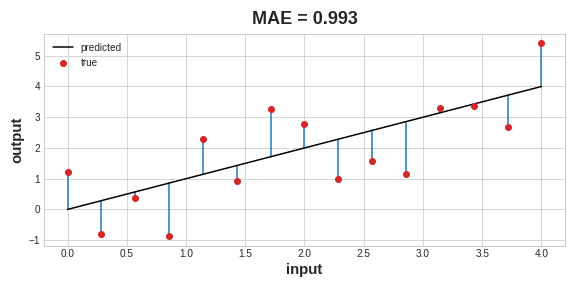

> The mean absolute error is the average length between the fitted curve and the data points.

## Optimizer

We know the problem we want the network to solve by loss function, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent (SGD). They are iterative algorithms that train a network in steps. One step of training goes like this:

- Sample some training data and run it through the network to make predictions.
- Measure the loss between the predictions and the true values.
- Finally, adjust the weights in a direction that makes the loss smaller.

>>
Note: The gradient is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient descent because it uses the gradient to descend the loss curve towards a minimum. Stochastic means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD!

A **Minibatch** or **Batch** refers to a small subset of the training data that is processed together during a single iteration of training.

In practice, training a neural network involves iterating over the training data multiple times, with each iteration referred to as an **Epoch**. At the end of each epoch, the performance of the model may be evaluated on a separate validation dataset, and the model's weights may be adjusted based on the observed performance.

- During each epoch, the training dataset is divided into minibatches, and each minibatch is processed sequentially through the neural network.
- After all minibatches have been processed, completing one epoch, the weights of the neural network may be updated based on the accumulated gradients from all minibatches.
- This process repeats for the specified number of epochs, with each epoch consisting of multiple minibatches.


### Learning Rate
It determines the rate at which the model's weights are updated in the direction that minimizes the loss function.
A higher learning rate leads to larger weight updates, which can result in faster convergence but may also lead to instability or overshooting the optimal solution.

**Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.



## Adding optimizer and loss function

In [5]:
model.compile(
    optimizer="adam",
    loss="mae",
)